## **Classification (Iris dataset)**

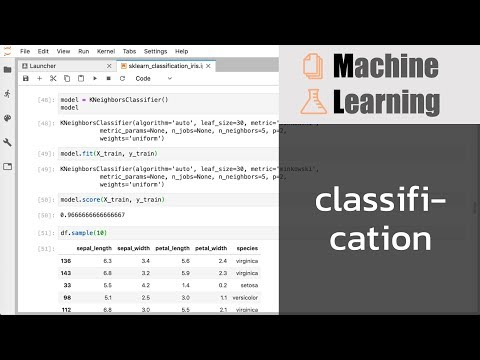

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('n2b_0GTN91Q', width=720, height=405)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
print(f"pandas  version = {pd.__version__}")
print(f"numpy   version = {np.__version__}")
print(f"seaborn version = {sns.__version__}")

pandas  version = 1.1.5
numpy   version = 1.19.5
seaborn version = 0.11.1


In [4]:
pd.Timestamp.now()

Timestamp('2021-05-12 18:44:54.122524')

In [6]:
df=pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/iris.csv')
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
90,5.5,2.6,4.4,1.2,versicolor
49,5.0,3.3,1.4,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
36,5.5,3.5,1.3,0.2,setosa
54,6.5,2.8,4.6,1.5,versicolor
129,7.2,3.0,5.8,1.6,virginica
75,6.6,3.0,4.4,1.4,versicolor
4,5.0,3.6,1.4,0.2,setosa
58,6.6,2.9,4.6,1.3,versicolor
133,6.3,2.8,5.1,1.5,virginica


In [7]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [8]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [9]:
df.species.value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

In [10]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

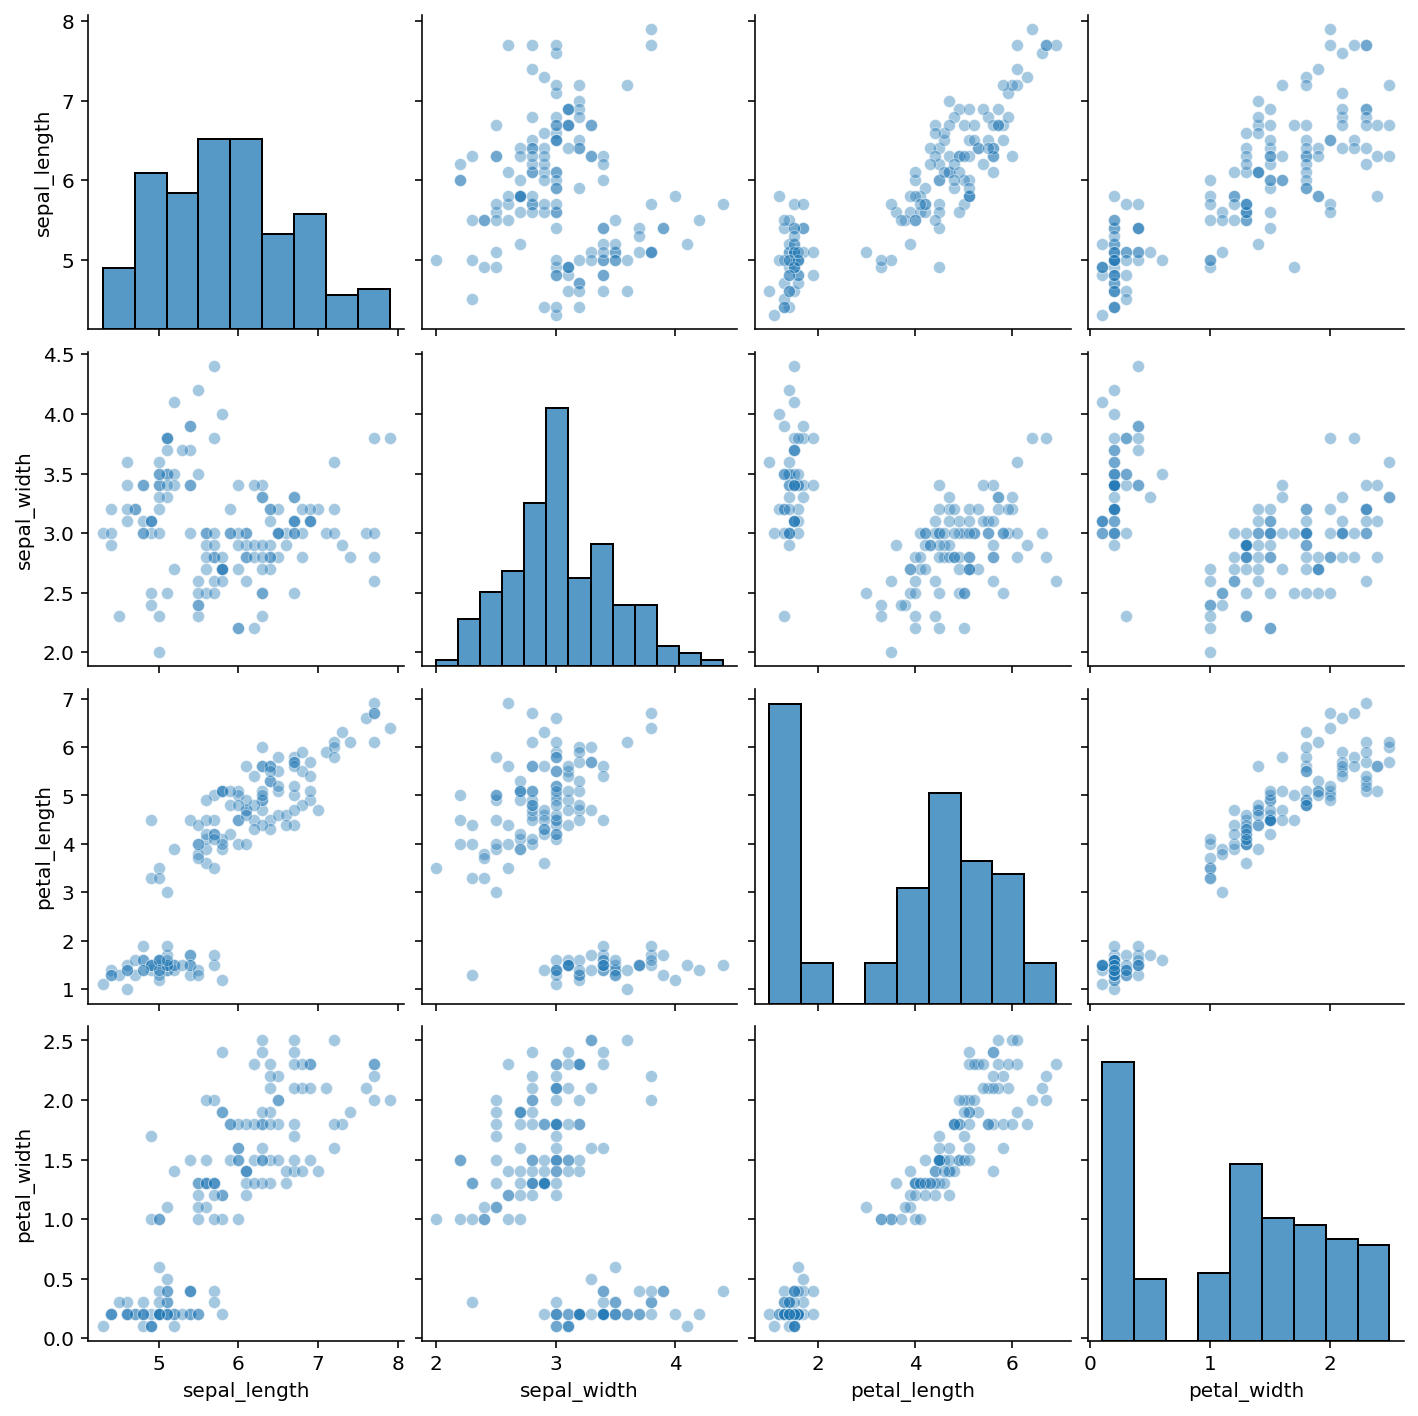

In [11]:
sns.pairplot(df, vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], 
#              hue='species', 
#              markers=['o', 'D', '+'],
             plot_kws={'alpha': .4});

ValueError: ignored

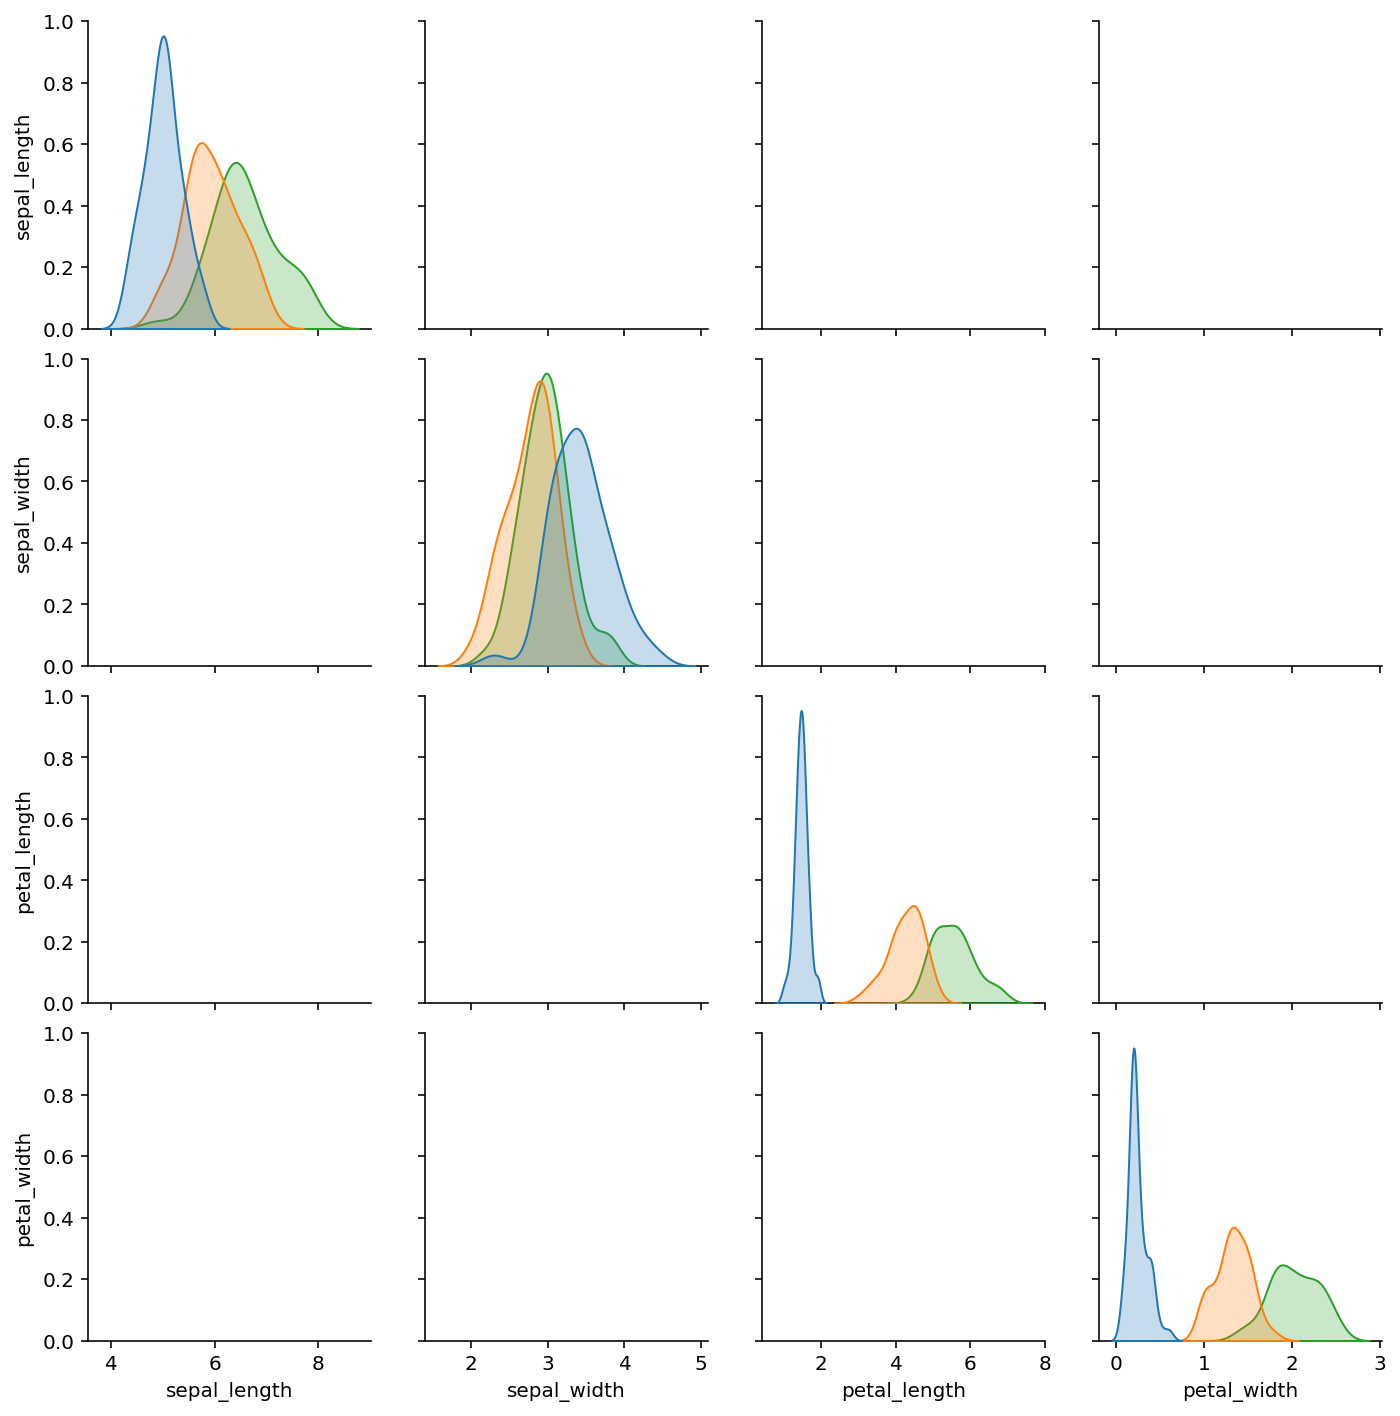

In [14]:
sns.pairplot(df, vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], 
             hue='species', 
             markers=['o', 'D', '+'],
             plot_kws={'alpha': .4});

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## **Scikit-learn: KNeighborsClassifier**

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [17]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [18]:
# use all data for training
# X_train = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
# y_train = df.species
# y_train = df.species_code

test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(
    df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], 
    df.species, 
    test_size=test_size, random_state=7)

In [19]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
126,6.2,2.8,4.8,1.8
79,5.7,2.6,3.5,1.0
22,4.6,3.6,1.0,0.2
139,6.9,3.1,5.4,2.1
74,6.4,2.9,4.3,1.3


In [20]:
y_train.head()

126     virginica
79     versicolor
22         setosa
139     virginica
74     versicolor
Name: species, dtype: object

In [21]:
X_test.head()

,sepal_length,sepal_width,petal_length,petal_width
149,5.9,3.0,5.1,1.8
84,5.4,3.0,4.5,1.5
40,5.0,3.5,1.3,0.3
66,5.6,3.0,4.5,1.5
106,4.9,2.5,4.5,1.7


In [22]:
y_test.head()

149     virginica
84     versicolor
40         setosa
66     versicolor
106     virginica
Name: species, dtype: object

In [23]:
model = KNeighborsClassifier(n_neighbors=5)
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [24]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [25]:
model.score(X_train, y_train)

0.9833333333333333

In [26]:
model.score(X_test, y_test)

0.9

In [27]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,species
30,4.8,3.1,1.6,0.2,setosa
149,5.9,3.0,5.1,1.8,virginica
57,4.9,2.4,3.3,1.0,versicolor
142,5.8,2.7,5.1,1.9,virginica
131,7.9,3.8,6.4,2.0,virginica
132,6.4,2.8,5.6,2.2,virginica
26,5.0,3.4,1.6,0.4,setosa
95,5.7,3.0,4.2,1.2,versicolor
144,6.7,3.3,5.7,2.5,virginica
82,5.8,2.7,3.9,1.2,versicolor


In [28]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
26,5.0,3.4,1.6,0.4,setosa
24,4.8,3.4,1.9,0.2,setosa
149,5.9,3.0,5.1,1.8,virginica
74,6.4,2.9,4.3,1.3,versicolor
117,7.7,3.8,6.7,2.2,virginica


In [29]:
model.predict([
    [3, 4, 5, 6]
              ])

array(['virginica'], dtype=object)

In [30]:
model.predict([
    [3, 4, 5, 6],
    [3, 4, 5, 2],
    [5, 3.5, 1.5, .2]
              ])

array(['virginica', 'versicolor', 'setosa'], dtype=object)

In [31]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [32]:
model.predict([
[5, 3, 1.2, .3],
[5, 3, 1.2, 2],
[6.5, 3, 5, 2]
              ])

array(['setosa', 'setosa', 'virginica'], dtype=object)

In [33]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [34]:
X_test[:5]

,sepal_length,sepal_width,petal_length,petal_width
149,5.9,3.0,5.1,1.8
84,5.4,3.0,4.5,1.5
40,5.0,3.5,1.3,0.3
66,5.6,3.0,4.5,1.5
106,4.9,2.5,4.5,1.7


In [35]:
y_test[:5]

149     virginica
84     versicolor
40         setosa
66     versicolor
106     virginica
Name: species, dtype: object

In [36]:
predicted = model.predict(X_test)
predicted

array(['virginica', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'versicolor', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'virginica'],
      dtype=object)

In [37]:
dx=pd.DataFrame({'y_true': y_test, 'y_pred': predicted})
# dx
dx[dx.y_true != dx.y_pred]

,y_true,y_pred
106,virginica,versicolor
77,versicolor,virginica
119,virginica,versicolor


In [38]:
cm=confusion_matrix(y_test, predicted)
cm

array([[ 7,  0,  0],
       [ 0, 11,  1],
       [ 0,  2,  9]])

In [39]:
labels=df.species.unique()
labels

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [40]:
dcm=pd.DataFrame(cm, index=labels, columns=labels)
dcm

,setosa,versicolor,virginica
setosa,7,0,0
versicolor,0,11,1
virginica,0,2,9


In [41]:
def grandtotal(df):
    '''
    add grand total to sklearn confusion matrix dataframe
    '''
    index_labels=df.index.tolist()
    df=df.append(df.sum(axis=0), ignore_index=True)
    df.index=index_labels + ['total']
    df['total']=df.sum(axis=1)
    return df

In [42]:
grandtotal(dcm)

,setosa,versicolor,virginica,total
setosa,7,0,0,7
versicolor,0,11,1,12
virginica,0,2,9,11
total,7,13,10,30


In [43]:
accuracy_score(y_test, predicted)

0.9

In [44]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.85      0.92      0.88        12
   virginica       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.92      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



## **Logistic Regression**

In [45]:
model_b = LogisticRegression(solver='liblinear')
model_b

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [46]:
model_b.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
model_b.score(X_train, y_train)

0.975

In [48]:
model_b.score(X_test, y_test)

0.8

In [50]:
print(confusion_matrix(y_test, predicted_b))

NameError: ignored

In [51]:
print(accuracy_score(y_test, predicted_b))

NameError: ignored

In [ ]:
print(classification_report(y_test, predicted_b))